In [40]:
import pandas as pd
import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
plt.style.use('bmh')
from scipy.stats import iqr

# Introduction

In this notebook, we perform Exploratory Data Analysis *(EDA)* and apply Principal Component Analysis *(PCA)* on the given dataset to understand its structure, relationships, and key patterns. The EDA phase will help us uncover the underlying characteristics of the data, such as distribution of features, correlations between variables, and the presence of any outliers or missing values.

Once the data is explored and cleaned, we will apply PCA, a dimensionality reduction technique, to identify the most important components in the data. PCA will allow us to transform the dataset into a lower-dimensional space while retaining as much variance as possible. This step is essential for simplifying complex datasets, visualizing relationships between features, and potentially improving model performance in subsequent machine learning tasks. By the end of the notebook we'll see that 8 components are enough to explain the variance. 

The dataset used (gdd) is one of the datasets provided on the MiT repository. It is composed by 18 columns with binary and numerical features, among them a Label feature that allows to build a supervised model.

The objectives of this notebook are:
1. Understand the dataset through EDA by visualizing feature distributions, correlations, and detecting outliers.
2. Perform PCA to reduce dimensionality and interpret the principal components.
3. Gain insights into the relationships between the features, focusing on variance explained by the components and how they can be used for further analysis or modeling.

By the end of this notebook, we will have a clearer understanding of the dataset’s structure and how PCA can be leveraged to simplify and interpret complex relationships within the data. This explanation ends by excecuting a SVC model which is one of the model of Kairos. 

In [54]:
dtf = datasets.gdd.load_data()
dtf.drop("Timestamp", axis=1, inplace=True)
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16220 entries, 0 to 16219
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Label                                 16220 non-null  int64
 1   MotorData.ActCurrent                  16220 non-null  int64
 2   MotorData.ActPosition                 16220 non-null  int64
 3   MotorData.ActSpeed                    16220 non-null  int64
 4   MotorData.IsAcceleration              16220 non-null  int64
 5   MotorData.IsForce                     16220 non-null  int64
 6   MotorData.Motor_Pos1reached           16220 non-null  int64
 7   MotorData.Motor_Pos2reached           16220 non-null  int64
 8   MotorData.Motor_Pos3reached           16220 non-null  int64
 9   MotorData.Motor_Pos4reached           16220 non-null  int64
 10  NVL_Recv_Ind.GL_Metall                16220 non-null  int64
 11  NVL_Recv_Ind.GL_NonMetall             162

In [6]:
dtf.describe().T

,count,mean,std,min,25%,50%,75%,max
Label,16220.0,4.835697,2.176235,0.0,4.00,6.0,6.0,8.0
MotorData.ActCurrent,16220.0,-4.714057,397.293682,-1181.0,-174.00,3.0,189.0,1181.0
MotorData.ActPosition,16220.0,207315.832922,107775.856354,22011.0,140012.00,229013.0,266191.0,389992.0
MotorData.ActSpeed,16220.0,139.400247,57928.033474,-422617.0,-53352.75,0.0,57275.0,110954.0
MotorData.IsAcceleration,16220.0,-1.587670,513.080888,-3045.0,0.00,0.0,0.0,6090.0
MotorData.IsForce,16220.0,-1.811961,89.007441,-256.0,-38.00,0.0,41.0,260.0
MotorData.Motor_Pos1reached,16220.0,0.063933,0.244642,0.0,0.00,0.0,0.0,1.0
MotorData.Motor_Pos2reached,16220.0,0.140382,0.347394,0.0,0.00,0.0,0.0,1.0
MotorData.Motor_Pos3reached,16220.0,0.194513,0.395837,0.0,0.00,0.0,0.0,1.0
MotorData.Motor_Pos4reached,16220.0,0.060296,0.238042,0.0,0.00,0.0,0.0,1.0


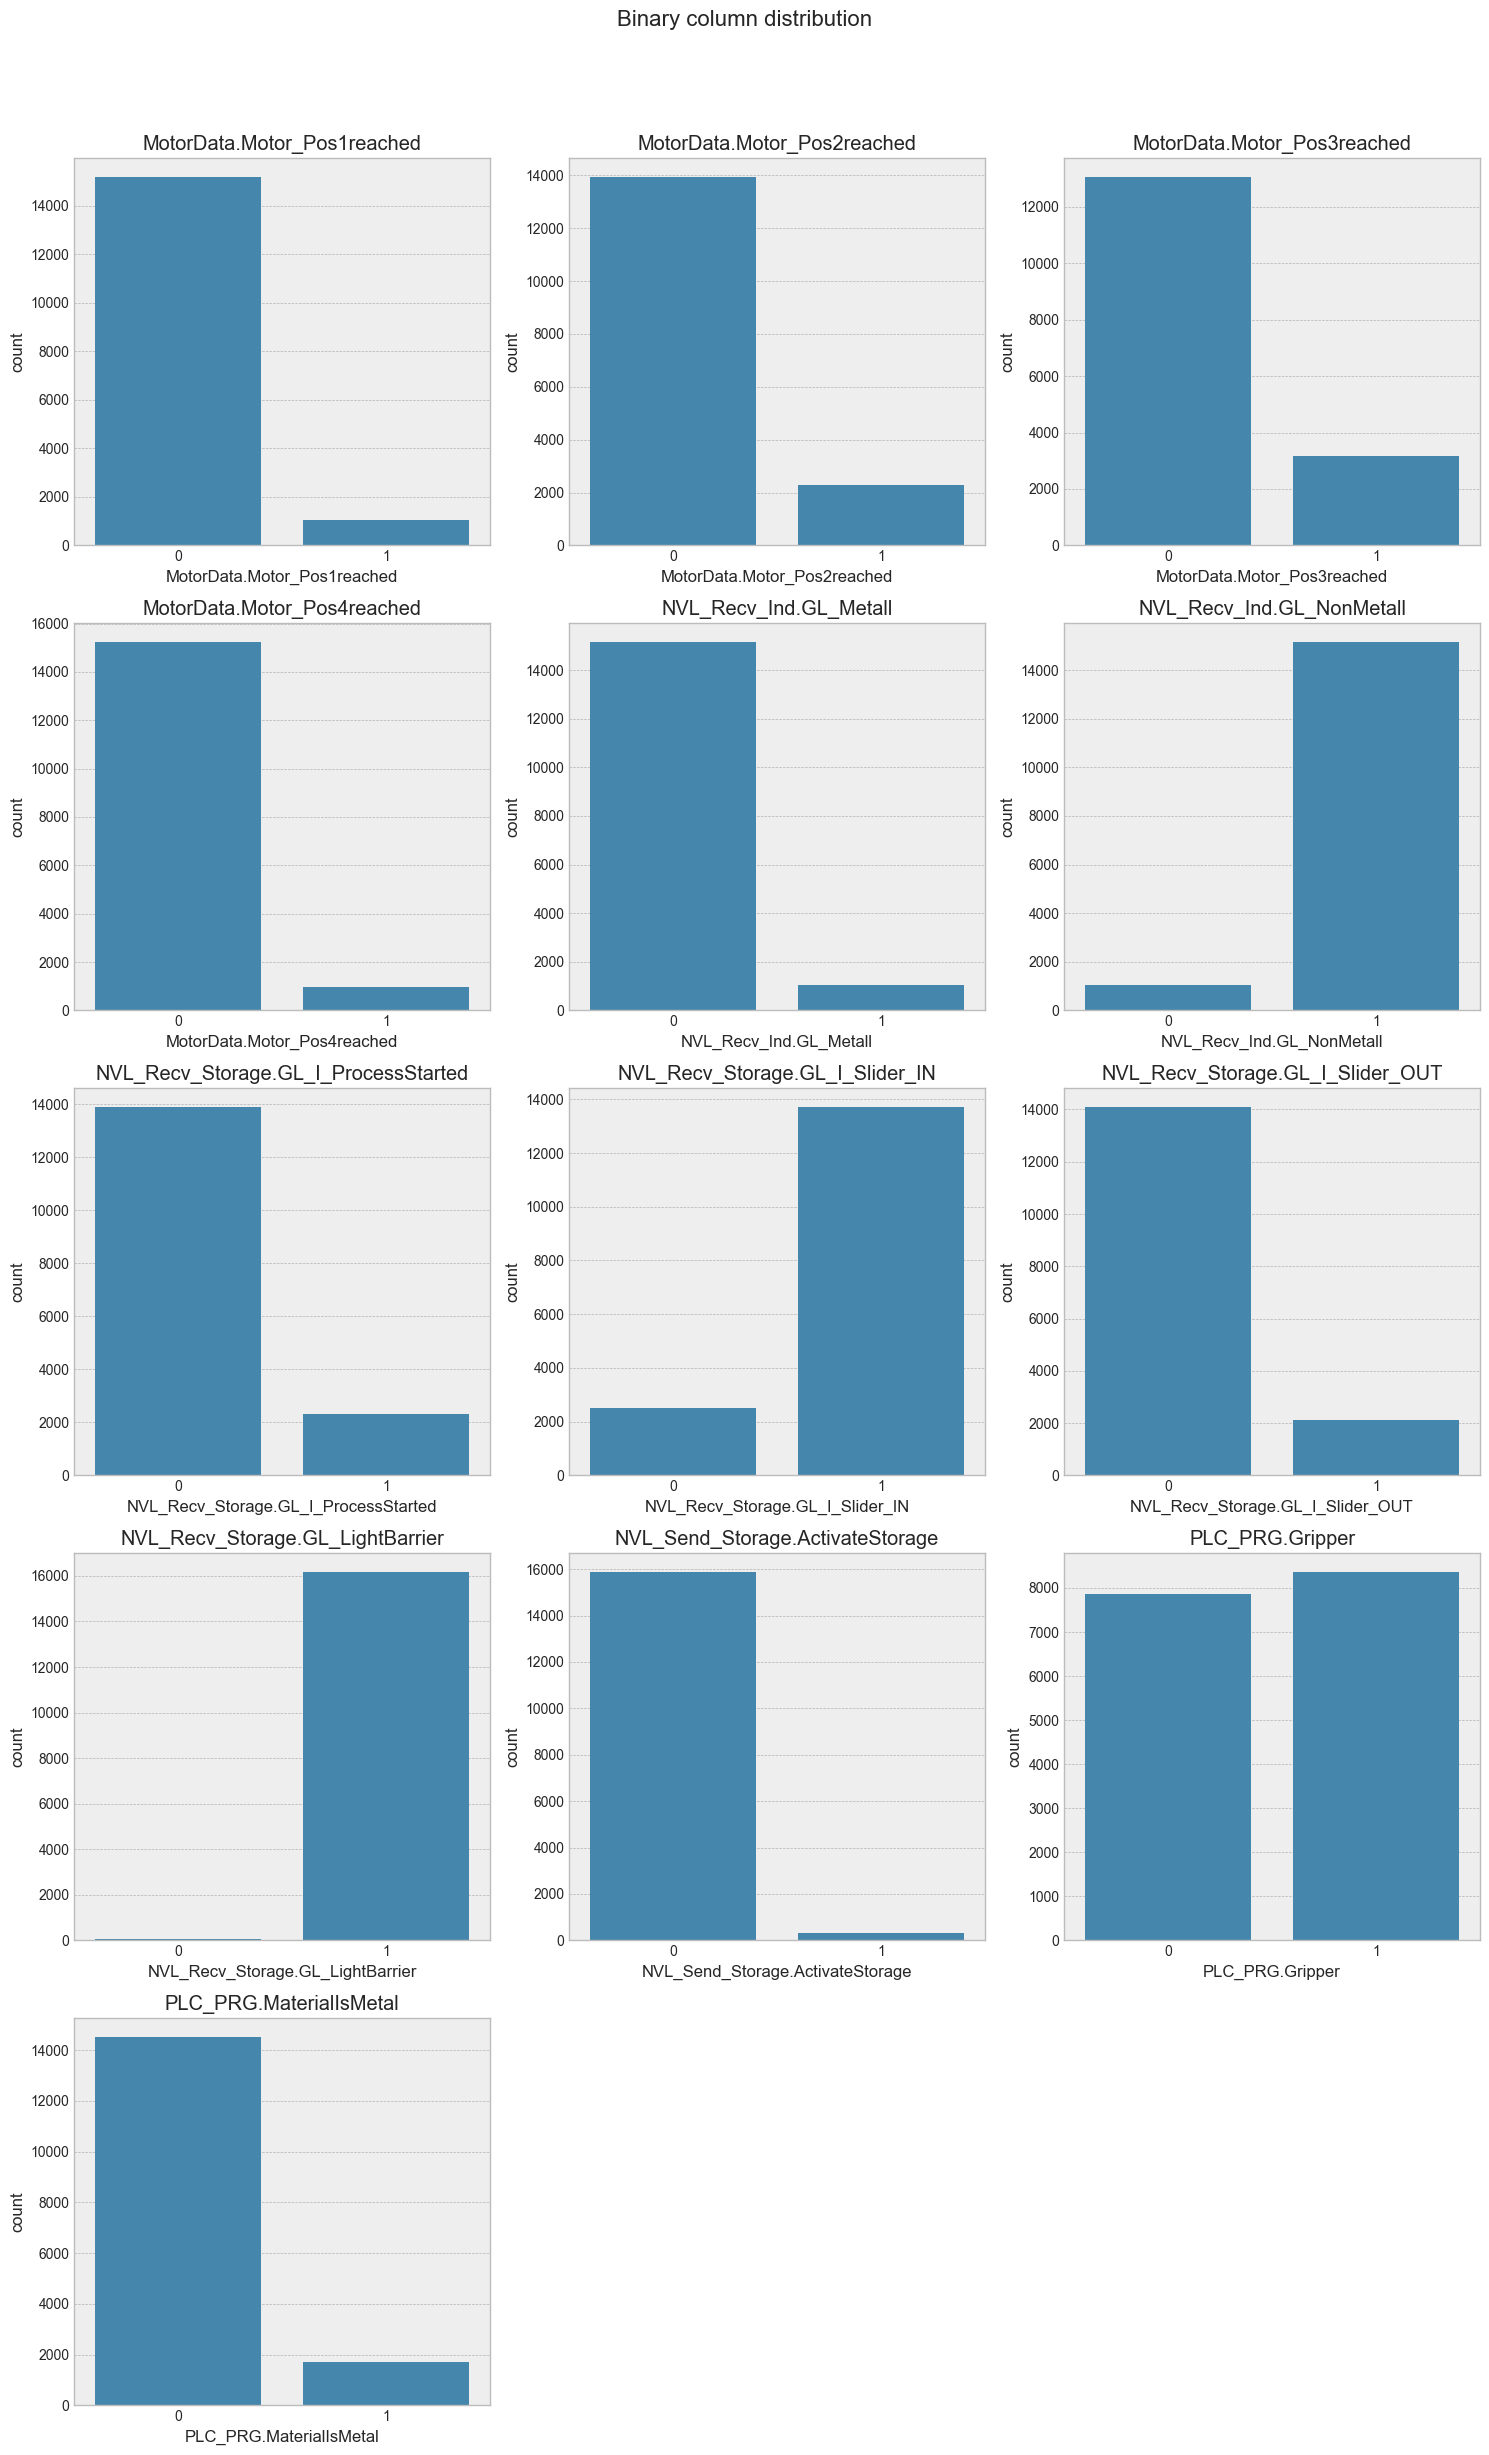

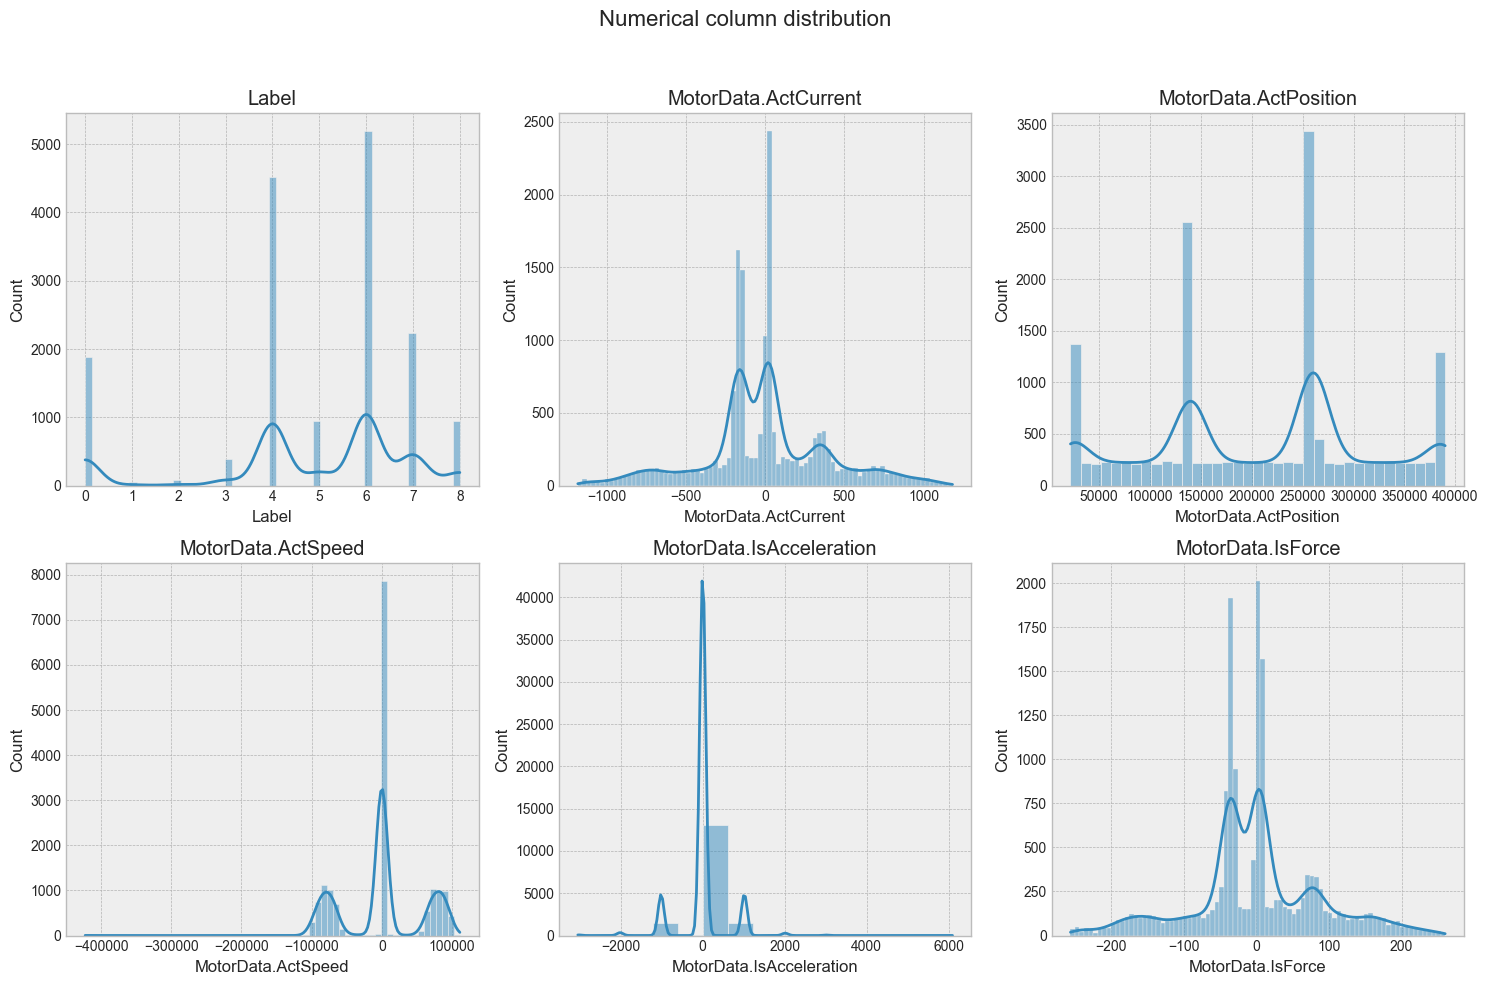

In [47]:
def plot_grid(columns, plot_type, title, n_cols=3):
    n_rows = math.ceil(len(columns)/n_cols)
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    fig.suptitle(title, fontsize = 16)
    axs = axs.flatten()

    for i, col in enumerate(columns):
        if plot_type == 'binary':
            sns.countplot(x=dtf[col], ax=axs[i])
            axs[i].set_title(f'{col}')
        elif plot_type == 'numerical':
            sns.histplot(dtf[col], kde=True, ax=axs[i])
            axs[i].set_title(f'{col}')
    
    for i in range(len(columns), len(axs)):
        fig.delaxes(axs[i])

    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()

plot_grid(binary_columns, "binary", "Binary column distribution")
plot_grid(numerical_columns, 'numerical', 'Numerical column distribution')



The distribution of the continuous classes are very unevenly distributed as well as their closeness to normality.
On the other hand, the binary classes are also very unbalanced. 
Now, we are going to analyze the Label target column

count    16220.000000
mean         4.835697
std          2.176235
min          0.000000
25%          4.000000
50%          6.000000
75%          6.000000
max          8.000000
Name: Label, dtype: float64


<Axes: xlabel='Label', ylabel='Count'>

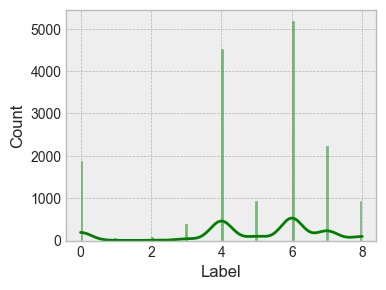

In [52]:
print(dtf["Label"].describe())
plt.figure(figsize=(4,3))
sns.histplot(dtf["Label"], color='g', bins=100, kde=True)

count    16220.000000
mean         1.628965
std          0.627724
min          0.000000
25%          1.609438
50%          1.945910
75%          1.945910
max          2.197225
Name: Label_log, dtype: float64


<Axes: xlabel='Label_log', ylabel='Count'>

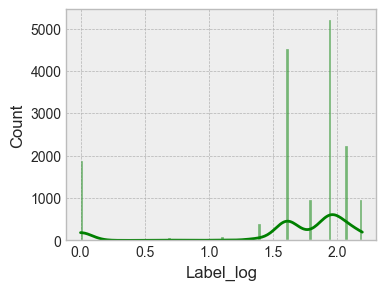

In [53]:
dtf["Label_log"] = np.log(dtf["Label"] + 1)
print(dtf["Label_log"].describe())
plt.figure(figsize=(4,3))
sns.histplot(dtf["Label_log"], color='g', bins=100, kde=True)

In [5]:
print("Original null value count:\n", dtf.isnull().sum())


Original null value count:
 Label                                   0
MotorData.ActCurrent                    0
MotorData.ActPosition                   0
MotorData.ActSpeed                      0
MotorData.IsAcceleration                0
MotorData.IsForce                       0
MotorData.Motor_Pos1reached             0
MotorData.Motor_Pos2reached             0
MotorData.Motor_Pos3reached             0
MotorData.Motor_Pos4reached             0
NVL_Recv_Ind.GL_Metall                  0
NVL_Recv_Ind.GL_NonMetall               0
NVL_Recv_Storage.GL_I_ProcessStarted    0
NVL_Recv_Storage.GL_I_Slider_IN         0
NVL_Recv_Storage.GL_I_Slider_OUT        0
NVL_Recv_Storage.GL_LightBarrier        0
NVL_Send_Storage.ActivateStorage        0
PLC_PRG.Gripper                         0
PLC_PRG.MaterialIsMetal                 0
dtype: int64


As we can see, all of the datacolumns are filled and do not contain NaN. So, a priori, the data is all relevant. Further exploration will be taken over to analyze which one can give us real insights. However, the "Timestamp" column will be deleted since time-relevant features are not used in this project. 

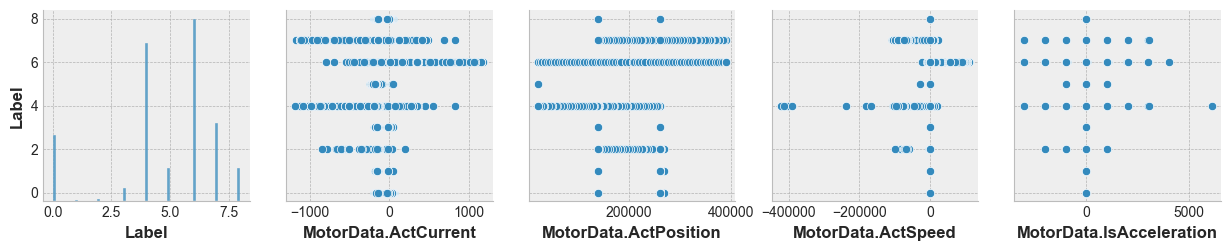

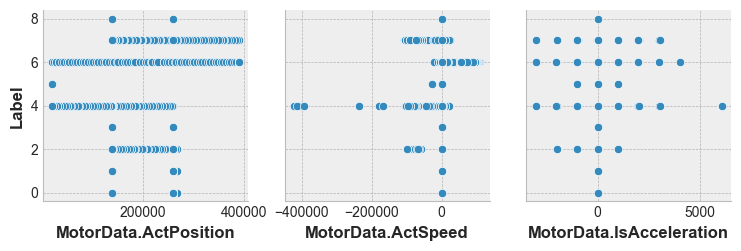

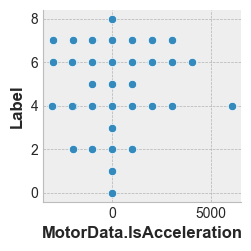

In [80]:
for i in range(0, len(num_df.columns), 2):
    sns.pairplot(data= num_df,
                 x_vars=num_df.columns[i:i+6],
                 y_vars=["Label"])

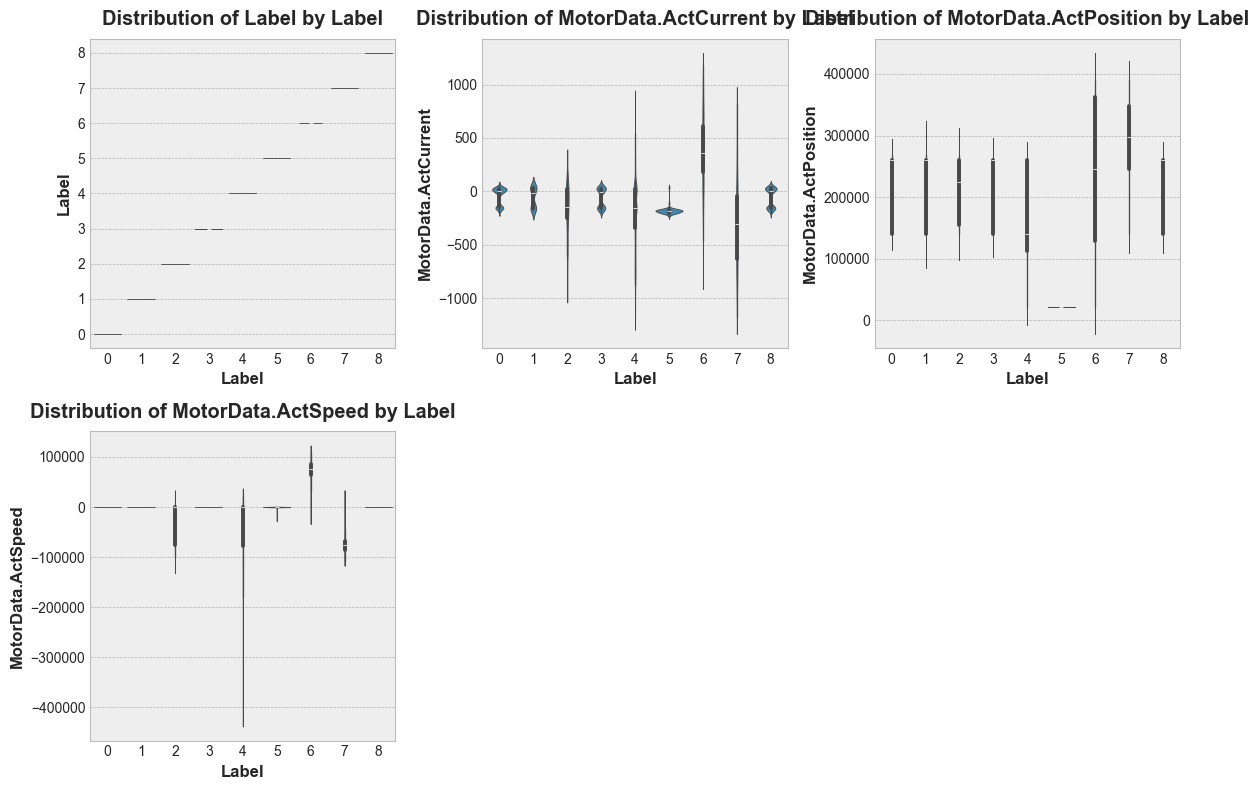

In [81]:
# Create a figure with subplots
plt.figure(figsize=(12, 8))

# Loop over each numerical column and plot
for i, col in enumerate(num_df.columns[:-1]):  # Exclude the 'Label' column for the loop
    plt.subplot(2, 3, i + 1)  # Adjust 2x3 based on the number of plots
    sns.violinplot(x='Label', y=col, data=num_df)
    plt.title(f'Distribution of {col} by Label')
    
plt.tight_layout()
plt.show()

As we can see from the pairplot the data is not very much related to it's Label. This will be a problem since the models will be very bad adjusted to the data and probably the predictions will tend to random guesses. 
From the violin plots we see that the ditribution of values is really wide and does not concentrate around the median. 

### Feature to feature relationship

<Axes: >

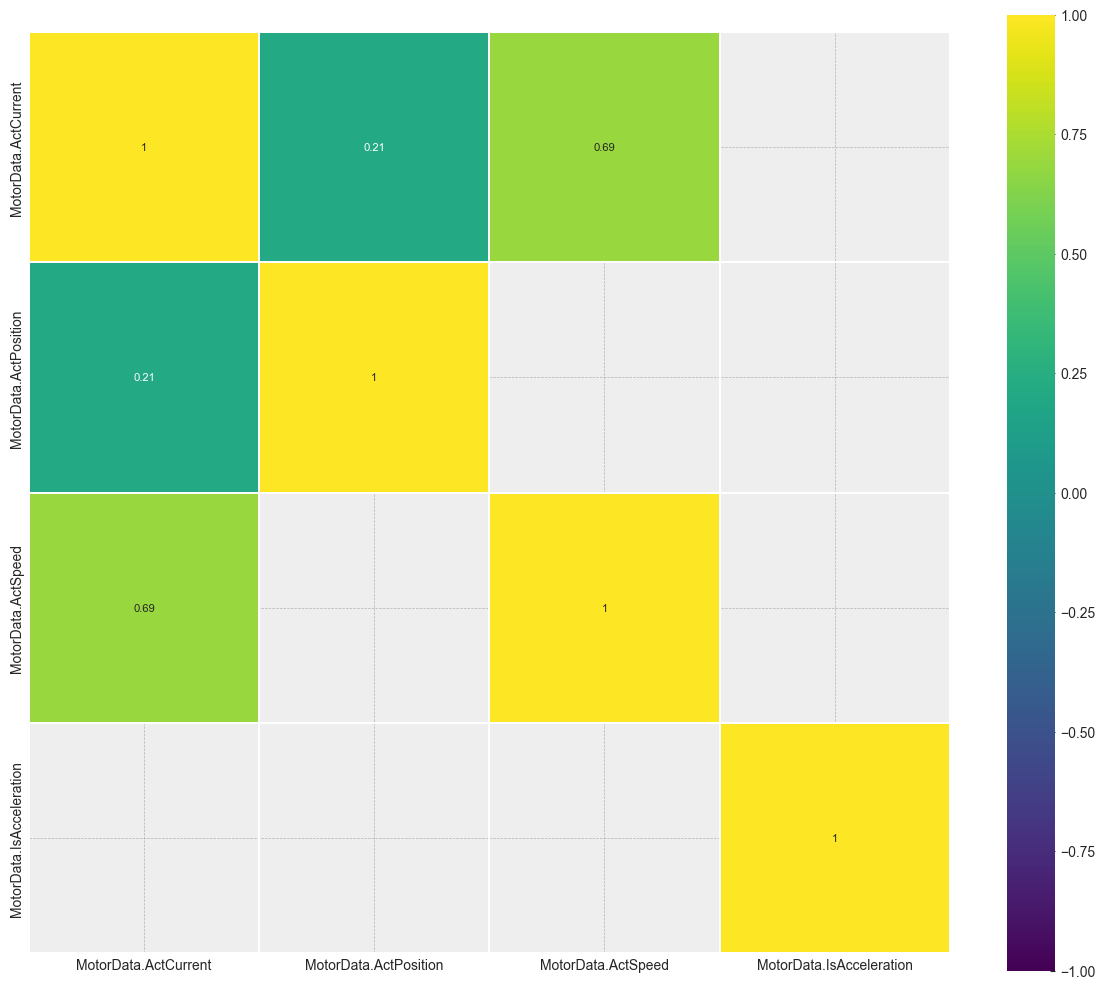

In [82]:
corr = num_df.drop("Label", axis=1).corr()
plt.figure(figsize=(12,10))

sns.heatmap(corr[(corr >=0.1) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0,
            linewidths=0.1,
            annot=True,
            annot_kws={'size':8},
            square=True)

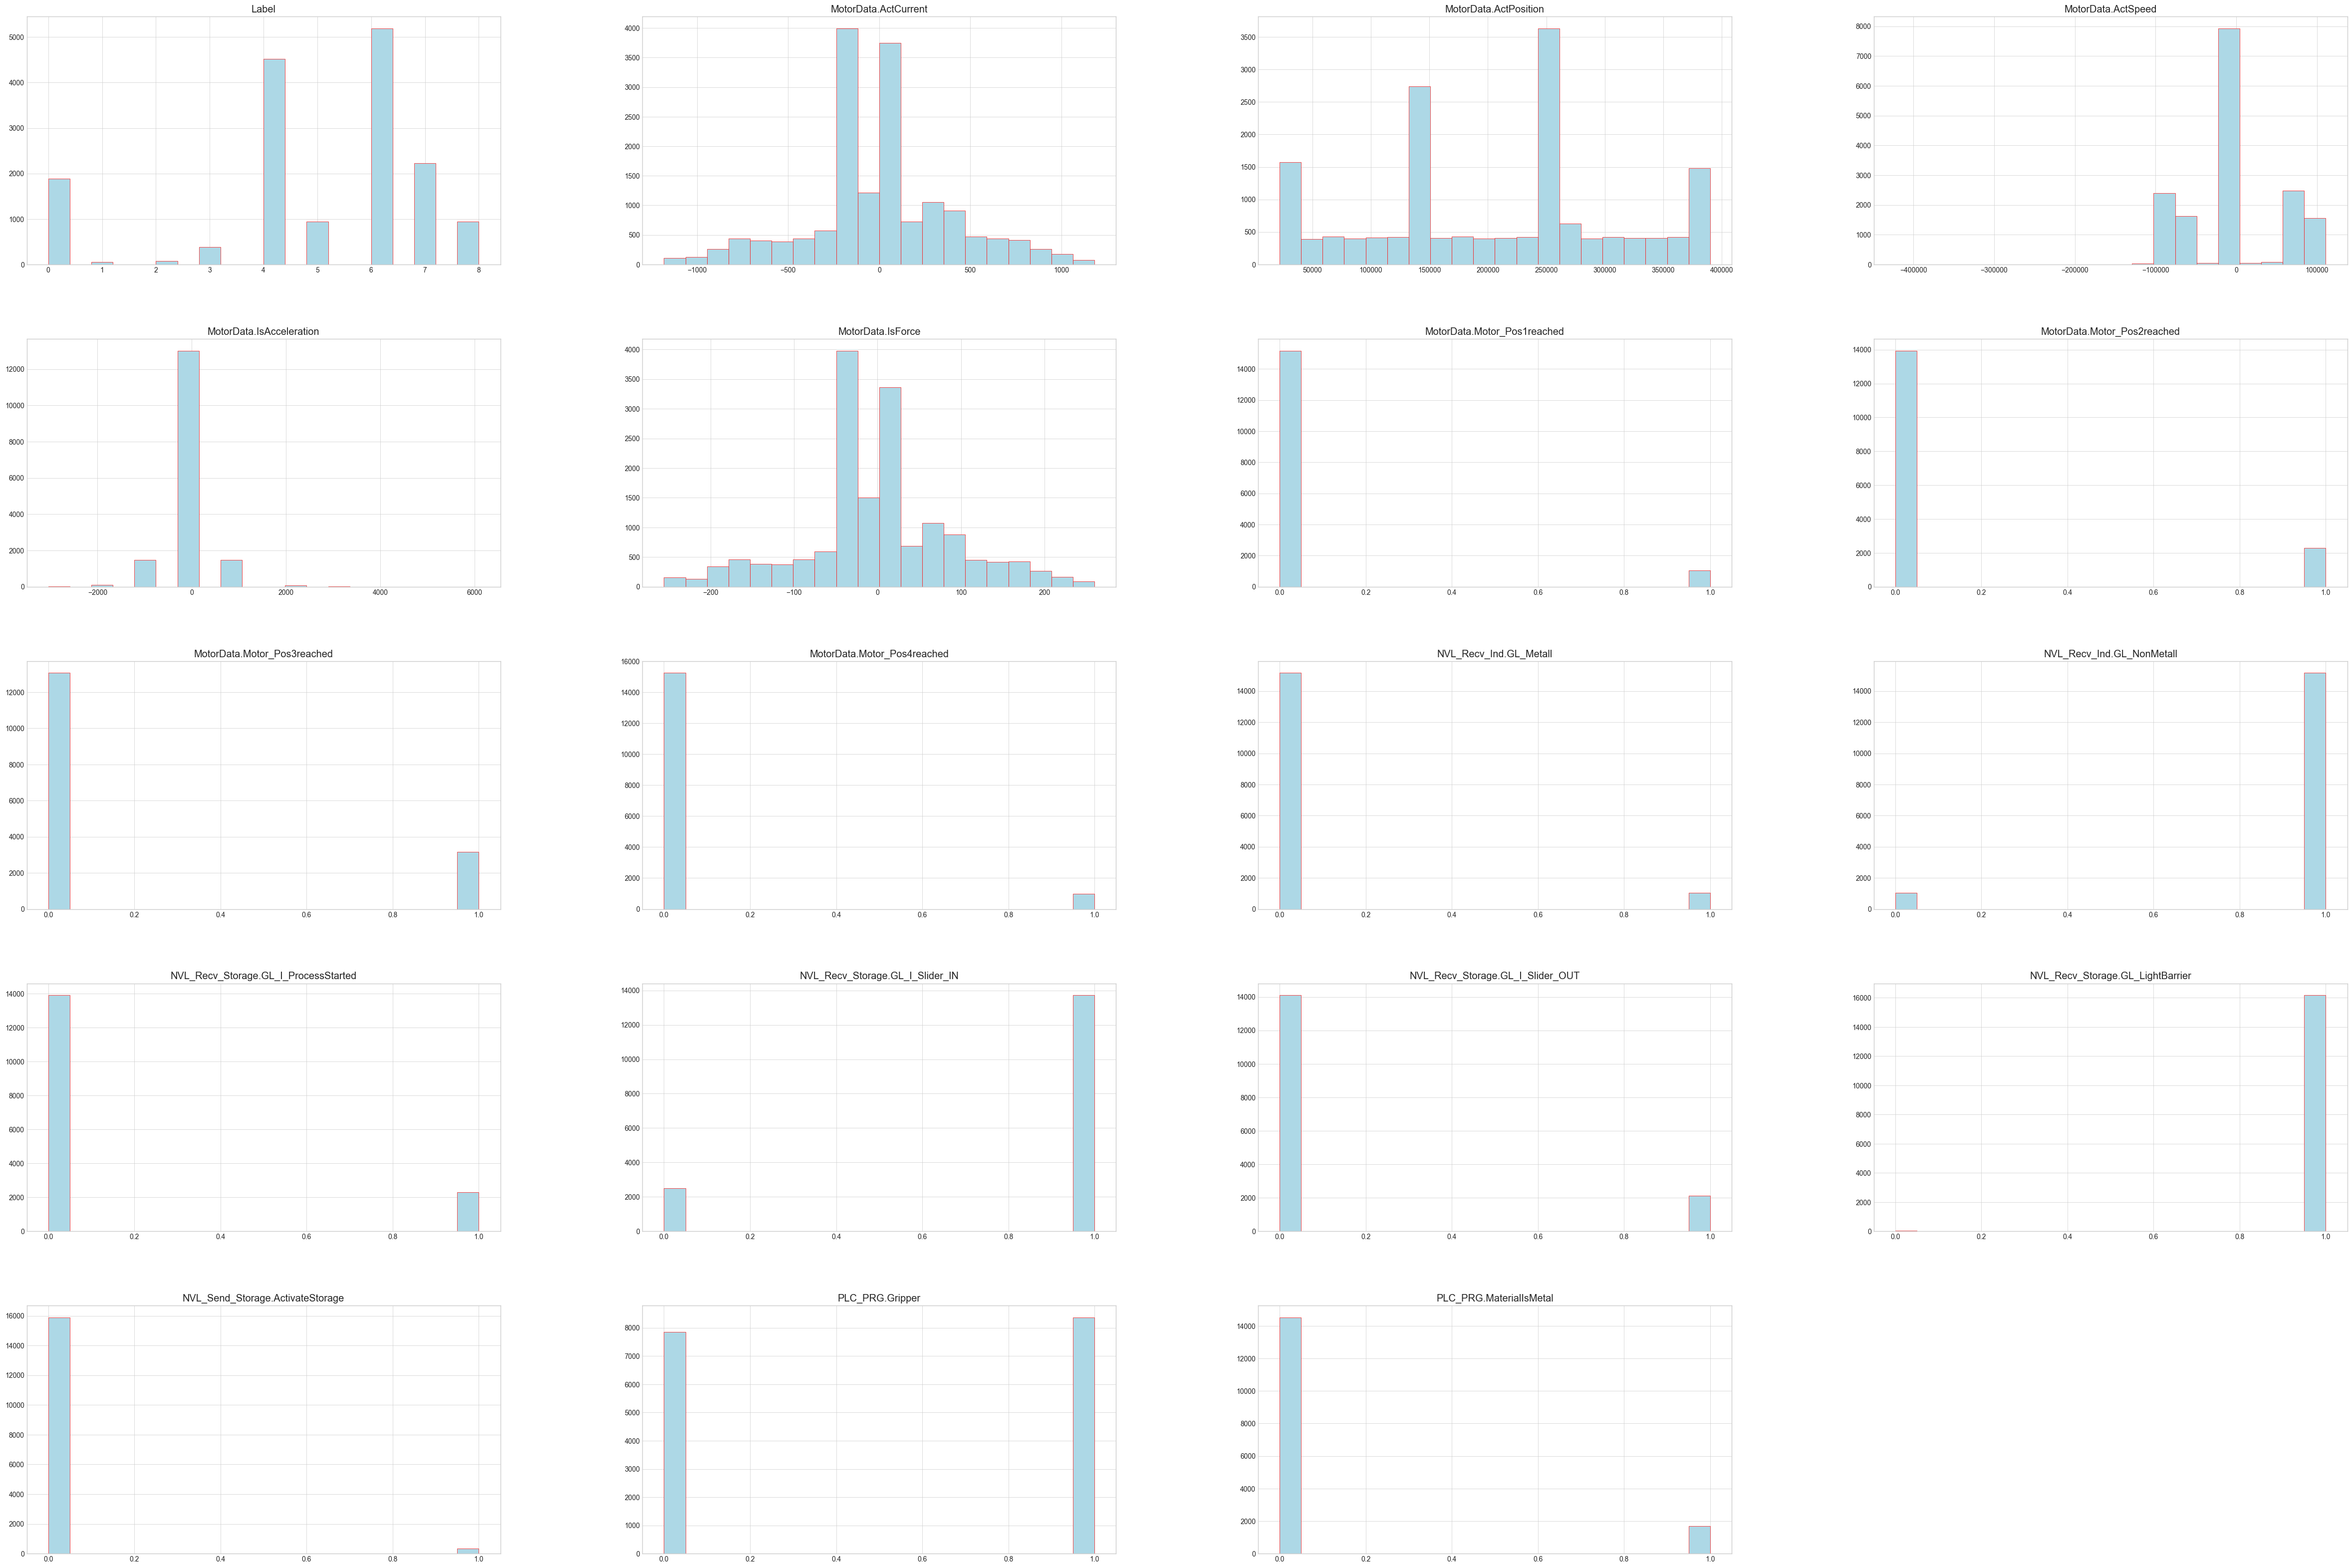

In [7]:
plt.style.use('seaborn-v0_8-whitegrid')
dtf.hist(bins=20, figsize=(60,40), color='lightblue', edgecolor='red')
plt.show()

In [8]:
skew_value = dtf.skew()
print("Skew Value of dataframe attributes: ", skew_value)

Skew Value of dataframe attributes:  Label                                   -0.969298
MotorData.ActCurrent                     0.075048
MotorData.ActPosition                   -0.062640
MotorData.ActSpeed                      -0.156669
MotorData.IsAcceleration                 0.126969
MotorData.IsForce                        0.052892
MotorData.Motor_Pos1reached              3.565379
MotorData.Motor_Pos2reached              2.070630
MotorData.Motor_Pos3reached              1.543688
MotorData.Motor_Pos4reached              3.694801
NVL_Recv_Ind.GL_Metall                   3.527928
NVL_Recv_Ind.GL_NonMetall               -3.527928
NVL_Recv_Storage.GL_I_ProcessStarted     2.046579
NVL_Recv_Storage.GL_I_Slider_IN         -1.916613
NVL_Recv_Storage.GL_I_Slider_OUT         2.193000
NVL_Recv_Storage.GL_LightBarrier       -20.064320
NVL_Send_Storage.ActivateStorage         6.752209
PLC_PRG.Gripper                         -0.063416
PLC_PRG.MaterialIsMetal                  2.581672
dtype: float6

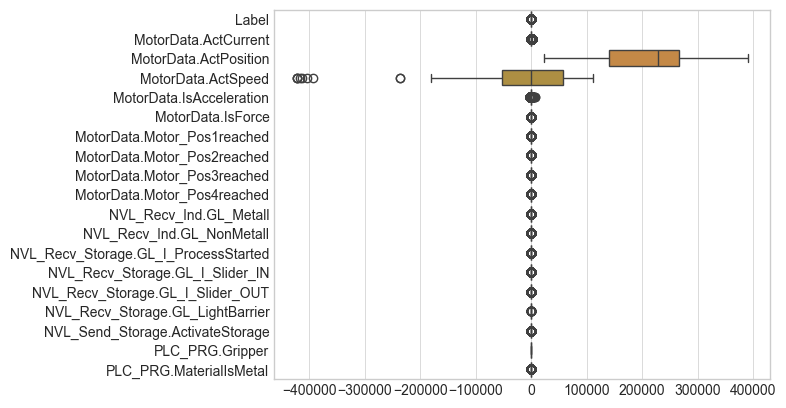

In [9]:
ax= sns.boxplot(data=dtf, orient='h')

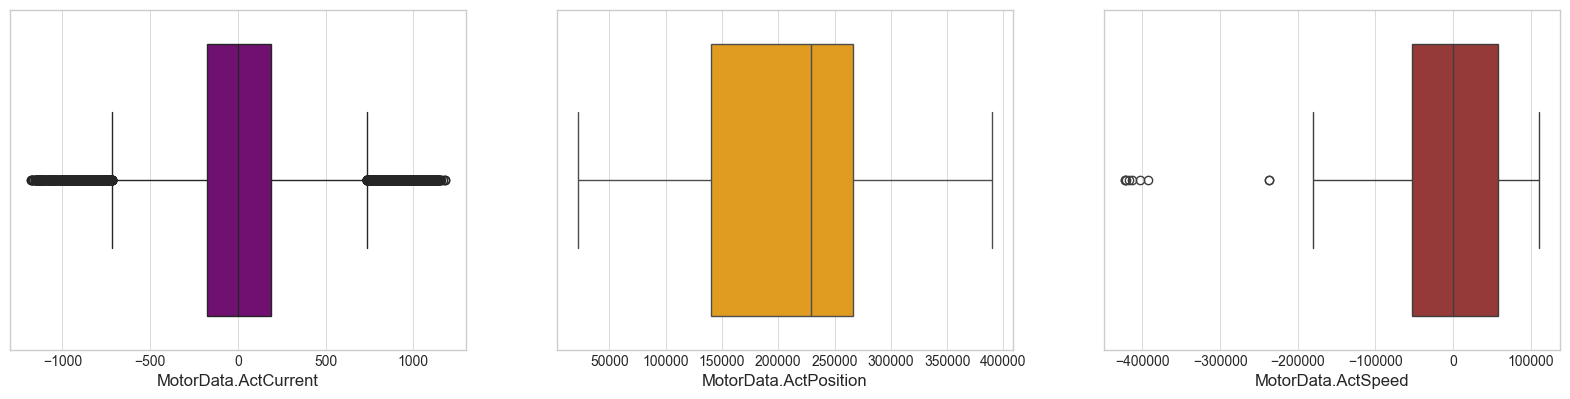

In [10]:
def plottingbox(df: pd.DataFrame, columns:list):
    plt.figure(figsize=(20,15))
    plt.subplot(3,3,1)
    sns.boxplot(x=df[columns[0]], color='purple')
    plt.subplot(3,3,2)
    sns.boxplot(x=df[columns[1]], color='orange')
    plt.subplot(3,3,3)
    sns.boxplot(x=df[columns[2]], color='brown')

    plt.show()

plottingbox(dtf, ["MotorData.ActCurrent", "MotorData.ActPosition", "MotorData.ActSpeed"])

### Outliers treatment:
Outliers should be deleted with caution since the removal of these could cause bias on the models. The outliers can be treated from the IQR. 

In [11]:
Q1 = dtf.quantile(0.25)
Q3 = dtf.quantile(0.75)
iqr = Q3 - Q1


clean_df = dtf[~((dtf< (Q1-1.5*iqr)) | (dtf > (Q3 + 1.5 * iqr))).any(axis=1)]
clean_df

,Label,MotorData.ActCurrent,MotorData.ActPosition,MotorData.ActSpeed,MotorData.IsAcceleration,MotorData.IsForce,MotorData.Motor_Pos1reached,MotorData.Motor_Pos2reached,MotorData.Motor_Pos3reached,MotorData.Motor_Pos4reached,NVL_Recv_Ind.GL_Metall,NVL_Recv_Ind.GL_NonMetall,NVL_Recv_Storage.GL_I_ProcessStarted,NVL_Recv_Storage.GL_I_Slider_IN,NVL_Recv_Storage.GL_I_Slider_OUT,NVL_Recv_Storage.GL_LightBarrier,NVL_Send_Storage.ActivateStorage,PLC_PRG.Gripper,PLC_PRG.MaterialIsMetal
315,4,-677,138504,-97904,0,-3,0,0,0,0,0,1,0,1,0,1,0,0,0
319,4,90,126034,-87145,0,-153,0,0,0,0,0,1,0,1,0,1,0,0,0
320,4,-342,122264,-96338,0,-134,0,0,0,0,0,1,0,1,0,1,0,0,0
321,4,-306,115797,-81258,0,-43,0,0,0,0,0,1,0,1,0,1,0,0,0
327,4,-166,92974,-69368,0,-47,0,0,0,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16050,6,101,314186,85260,0,58,0,0,0,0,0,1,0,1,0,1,0,1,0
16051,6,366,317811,73109,0,81,0,0,0,0,0,1,0,1,0,1,0,1,0
16053,6,-202,329788,86652,0,73,0,0,0,0,0,1,0,1,0,1,0,1,0
16056,6,73,339387,67947,0,-3,0,0,0,0,0,1,0,1,0,1,0,1,0


As seen, the shape of the dataframe is drastically reduced since the dispersion of the data is very irregular. We'll try to treat those that, according to the boxplots visually return a likely-to-be-treated option.

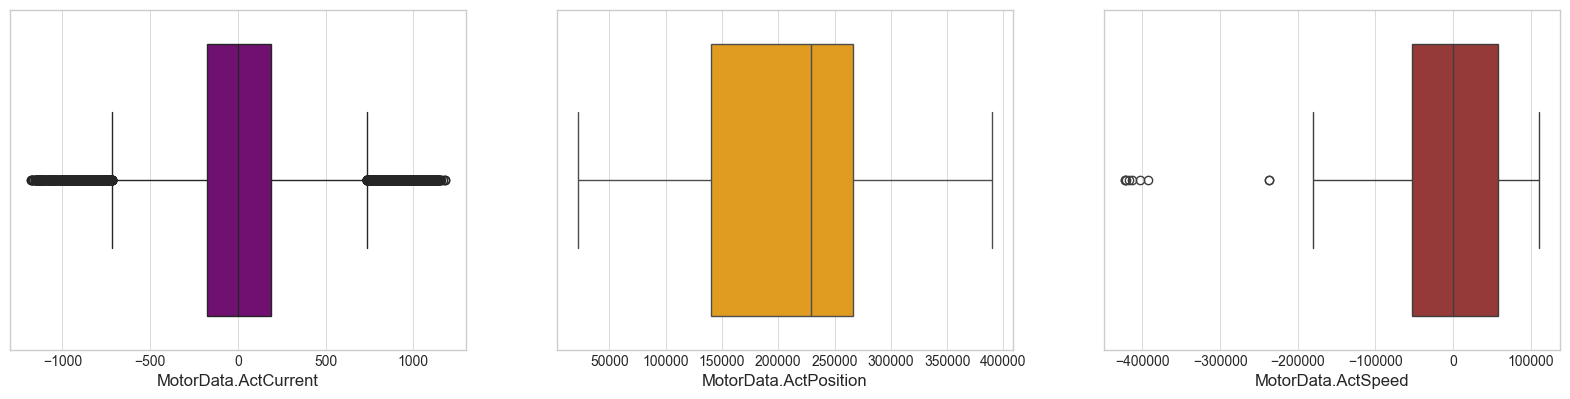

(14476, 19)


In [12]:
# Define the columns to filter outliers
columns = ['MotorData.ActSpeed', 'MotorData.ActCurrent']

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each selected column
Q1 = dtf[columns].quantile(0.25)
Q3 = dtf[columns].quantile(0.75)

# Calculate IQR for each column
iqr = Q3 - Q1

# Define the lower and upper bounds for outlier detection for both columns
lower_bound = Q1 - 1.5 * iqr
upper_bound = Q3 + 1.5 * iqr

# Filter out the outliers in both columns
clean_df = dtf[
    (dtf['MotorData.ActSpeed'] >= lower_bound['MotorData.ActSpeed']) & 
    (dtf['MotorData.ActSpeed'] <= upper_bound['MotorData.ActSpeed']) &
    (dtf['MotorData.ActCurrent'] >= lower_bound['MotorData.ActCurrent']) & 
    (dtf['MotorData.ActCurrent'] <= upper_bound['MotorData.ActCurrent'])
]

plottingbox(dtf, ["MotorData.ActCurrent", "MotorData.ActPosition", "MotorData.ActSpeed"])
print(clean_df.shape)


In [13]:
clean_df

,Label,MotorData.ActCurrent,MotorData.ActPosition,MotorData.ActSpeed,MotorData.IsAcceleration,MotorData.IsForce,MotorData.Motor_Pos1reached,MotorData.Motor_Pos2reached,MotorData.Motor_Pos3reached,MotorData.Motor_Pos4reached,NVL_Recv_Ind.GL_Metall,NVL_Recv_Ind.GL_NonMetall,NVL_Recv_Storage.GL_I_ProcessStarted,NVL_Recv_Storage.GL_I_Slider_IN,NVL_Recv_Storage.GL_I_Slider_OUT,NVL_Recv_Storage.GL_LightBarrier,NVL_Send_Storage.ActivateStorage,PLC_PRG.Gripper,PLC_PRG.MaterialIsMetal
0,0,-5,268975,0,0,-1,0,0,0,0,0,1,0,1,0,1,0,0,0
1,0,0,268975,0,0,-1,0,0,0,0,0,1,0,1,0,1,0,0,0
2,0,-5,268975,0,0,-3,0,0,0,0,0,1,0,1,0,1,0,0,0
3,0,0,268975,0,0,4,0,0,0,0,0,1,0,1,0,1,0,0,0
4,0,0,268975,0,0,4,0,0,0,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16215,0,8,260014,0,0,-1,0,0,1,0,0,1,0,1,0,1,0,0,0
16216,0,-21,260014,0,0,-4,0,0,1,0,0,1,0,1,0,1,0,0,0
16217,0,-17,260014,0,0,-4,0,0,1,0,0,1,0,1,0,1,0,0,0
16218,0,-17,260014,0,0,-4,0,0,1,0,0,1,0,1,0,1,0,0,0


### Understanding the correlations:
Data correlation helps in understanding the relationships between various variables and attributes in a dataset. It allows you to derive insights, such as whether one or more attributes are influenced by or act as a cause for others, and how attributes may be associated with one another. Methods like Spearman and Pearson are commonly used to measure the strength of these relationships. Pearson's Correlation Coefficient, in particular, is applied to continuous variables that exhibit a linear relationship, making it a useful tool for understanding dependencies and associations in such datasets.

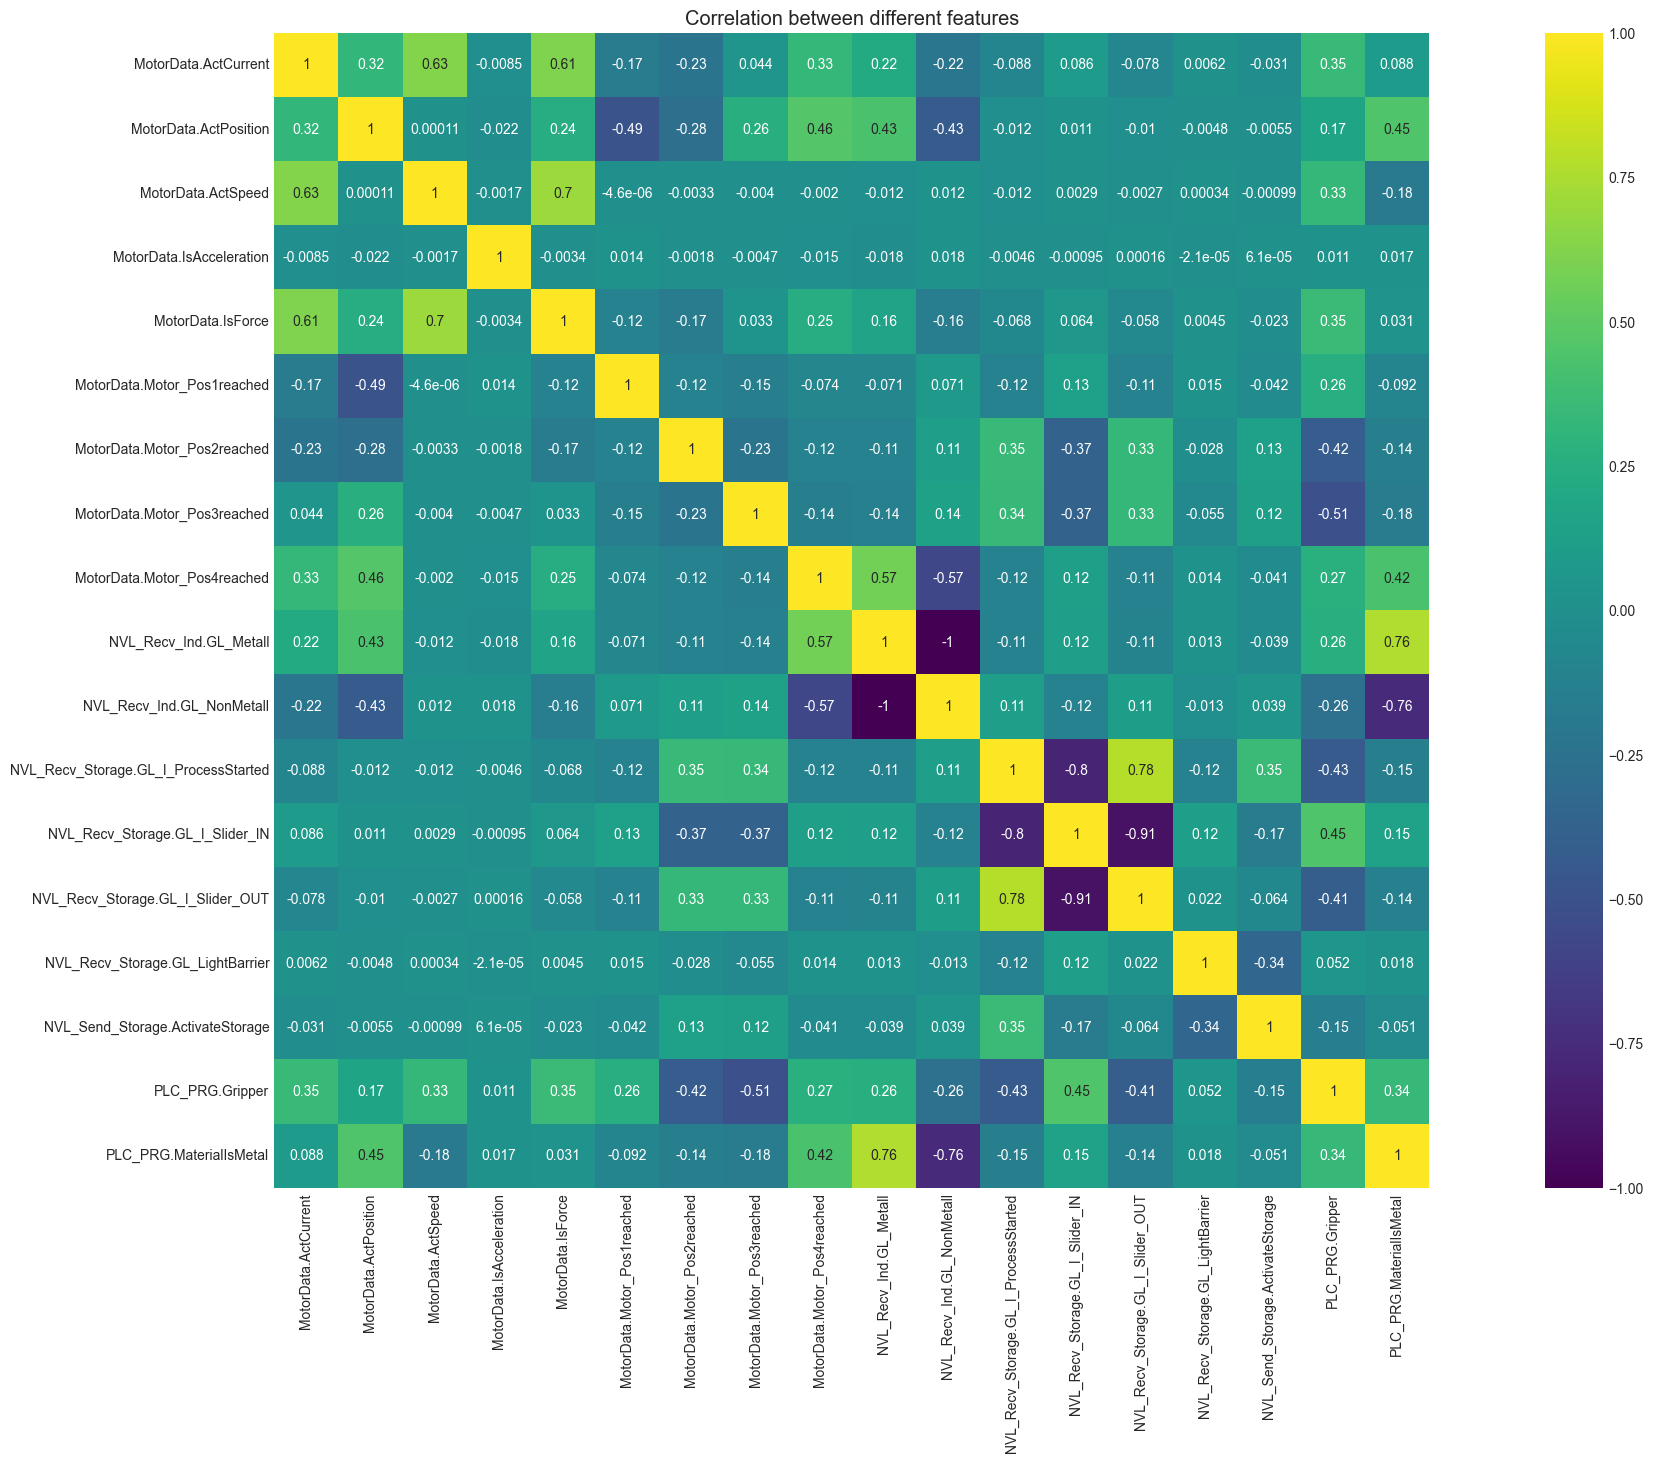

In [14]:
def correlation_heatmap(dataframe,l,w):
    
    correlation = dataframe.corr()
    plt.figure(figsize=(l,w))
    sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
    plt.title('Correlation between different features')
    plt.show();
    
# Let's Drop Class column and see the correlation Matrix & Pairplot Before using this dataframe for PCA as PCA should only be perfromed on independent attribute
cleandf= clean_df.drop('Label', axis=1)

correlation_heatmap(cleandf, 30,15)

*MotorData.ActCurrent*:
   - **Moderate positive correlation with MotorData.ActSpeed (0.64)**: This suggests that as the motor’s current increases, the speed also tends to increase. This is expected in many motor systems, as higher currents often correspond to higher speeds in motors operating under normal conditions.
   - **Moderate positive correlation with MotorData.IsForce (0.61)**: The current and force are closely related, as an increase in the motor’s current often results in greater force or torque being applied.
   - **Weak positive correlation with MotorData.ActPosition (0.32)**: The position of the motor is not as strongly influenced by current, likely because position is more dependent on other variables such as speed and control mechanisms.
   - **Very weak negative correlation with MotorData.IsAcceleration (-0.085)**: Current and acceleration show little to no relationship. Acceleration may depend more on dynamic factors such as load changes and speed control, rather than directly on current.

*MotorData.ActPosition*:
   - **Moderate positive correlation with MotorData.ActSpeed (0.26)**: Position and speed are moderately related. This relationship indicates that as the motor moves faster, its position changes more rapidly, but there are other factors influencing the position as well.
   - **Weak negative correlation with MotorData.IsAcceleration (-0.022)**: Position and acceleration are weakly negatively correlated, indicating that as the motor accelerates, the position may change slightly, but this effect is small.
   - **Slight positive correlation with MotorData.IsForce (0.25)**: Position and force have a low positive correlation, which may indicate that some force is required to change the motor’s position, but other variables such as speed and current have a greater effect.

*MotorData.ActSpeed*:
   - **Strong positive correlation with MotorData.ActCurrent (0.64)**: As mentioned earlier, there is a strong relationship between speed and current, where an increase in current generally leads to an increase in speed.
   - **Moderate positive correlation with MotorData.IsForce (0.33)**: Speed and force are somewhat correlated, as faster motor operation may require more force under certain conditions, especially when handling load changes.
   - **Weak negative correlation with MotorData.IsAcceleration (-0.004)**: Speed and acceleration have a very weak negative correlation, which could indicate that once the motor reaches a stable speed, acceleration decreases slightly.

*MotorData.IsAcceleration*:
   - **Moderate positive correlation with MotorData.IsForce (0.25)**: Acceleration and force are moderately related, as greater force is generally required to accelerate a motor. However, the correlation is not particularly strong, indicating that other factors may also play a significant role in acceleration.
   - **Weak correlations with other variables**: Acceleration shows weak correlations with the other variables (`MotorData.ActCurrent`, `MotorData.ActPosition`, `MotorData.ActSpeed`), suggesting that it operates relatively independently of these features.
   
*MotorData.IsForce*:
   - **Moderate positive correlation with MotorData.ActCurrent (0.61)**: As noted, current and force are closely related, likely due to the electrical-mechanical interaction in motor systems where an increase in current often generates more force or torque.
   - **Moderate positive correlation with MotorData.ActSpeed (0.33)**: Speed and force also show a moderate positive relationship, meaning that as the motor operates faster, the force also increases, possibly due to greater resistance or load handling.
   - **Weak correlations with MotorData.ActPosition (0.25) and MotorData.IsAcceleration (0.25)**: Force is moderately linked to position and acceleration, but other factors likely contribute more to these dynamics.


In [16]:
binary_columns = [col for col in dtf.columns if dtf[col].nunique()==2]
numerical_columns = [col for col in dtf.columns if dtf[col].nunique() > 2]


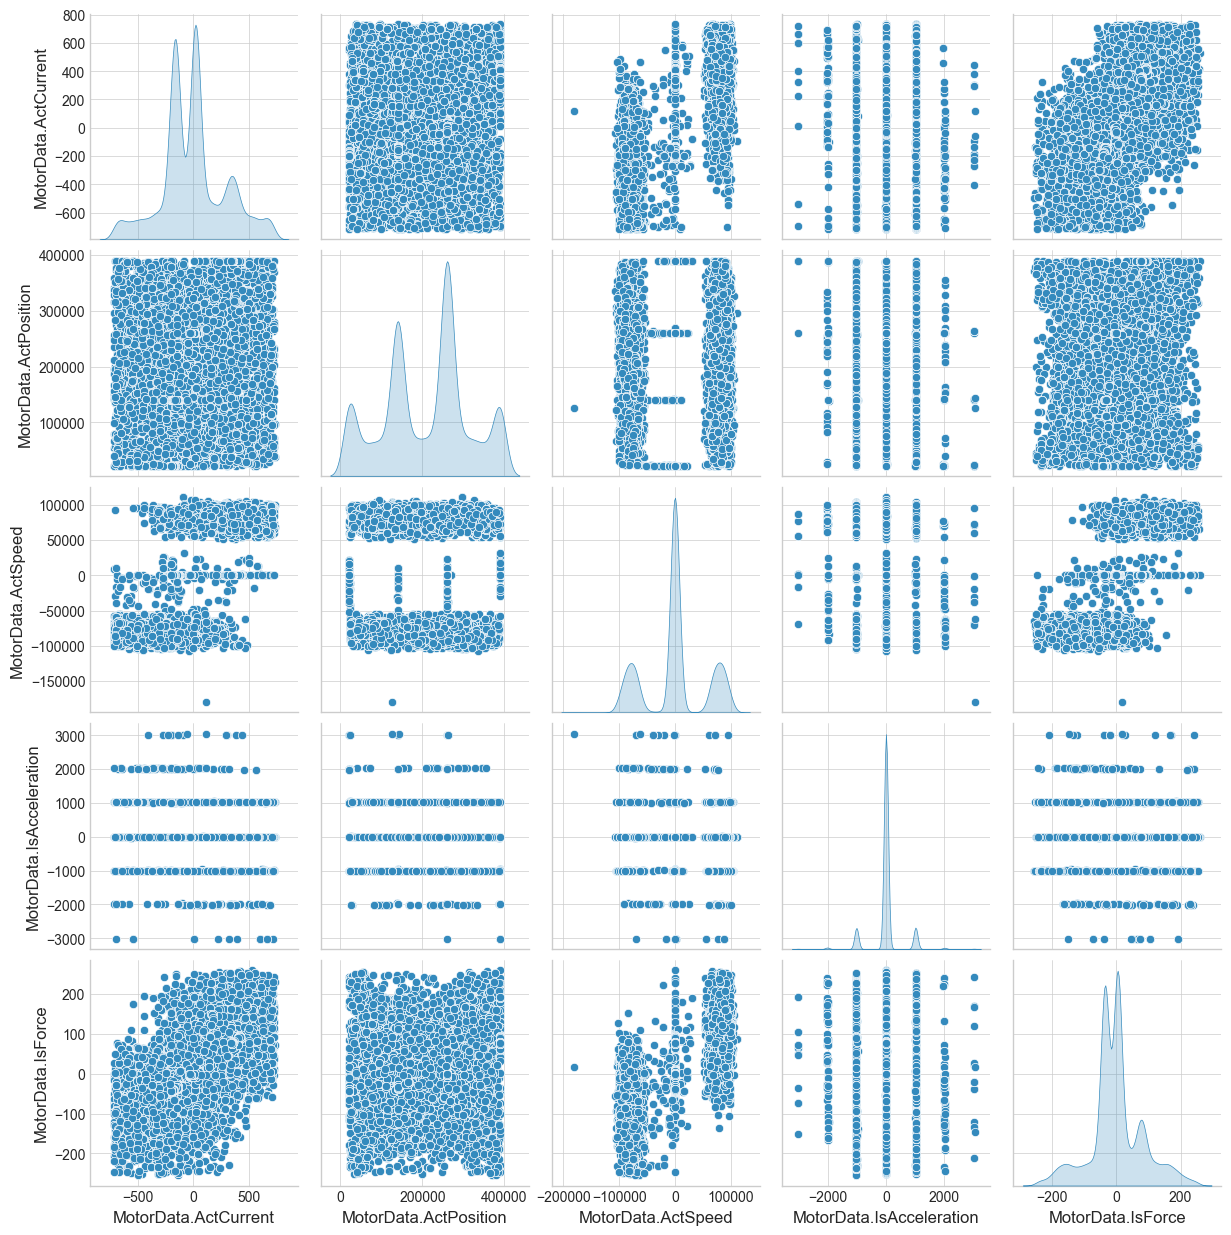

In [17]:
sns.pairplot(cleandf[numerical_columns[1::]], diag_kind="kde")


In [28]:
X = dtf.iloc[:,1:].values
y = dtf.iloc[:, 0].values

sc = StandardScaler()
X_std = sc.fit_transform(X)


In [30]:
cov_mat = np.cov(X_std.T)
print("Covariance matrix's shape: ", cov_mat.shape)

eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Covariance matrix's shape:  (18, 18)
Eigen Vectors 
%s [[ 1.79340799e-01  8.00413301e-02  4.97978787e-01 -1.54809881e-02
  -2.07751155e-03 -3.65452747e-02  1.37501853e-02 -7.79971354e-02
   8.07608817e-02  5.28480703e-03  3.43119149e-01  6.57782976e-01
   2.78113521e-01  2.50977952e-01 -8.31722535e-02  3.71578159e-02
  -6.34005398e-04 -9.72525162e-17]
 [ 2.19278680e-01  3.23317586e-01  1.23425725e-02  4.07949078e-01
  -2.89421981e-02 -1.14492935e-01  2.60172620e-02  2.39033883e-01
  -2.02846633e-01 -1.43989195e-01 -5.35081186e-01  1.92132832e-01
  -1.94089017e-01  3.28616414e-01 -6.03248558e-02 -2.73193296e-01
  -2.81550145e-03 -3.81417468e-17]
 [ 9.60886084e-02  4.83006045e-04  5.57578659e-01 -1.61377659e-01
   6.39216598e-03 -3.85384553e-02 -3.49128579e-02 -1.27158701e-01
   1.59341277e-02  1.99058140e-01 -1.50855241e-01  1.90086269e-02
  -4.48788741e-01 -4.71785344e-01  1.88323114e-01 -3.35351593e-01
  -1.36671399e-04 -8.72799985e-17]
 [-8.57817331e-03 -2.26848036e-02  2.76267715e-0

In [32]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
eig_pairs.sort()
eig_pairs.reverse()


# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[np.float64(4.239827384566931), np.float64(2.9088074154746786), np.float64(2.4473237635143708), np.float64(1.42808389442751), np.float64(1.354083692841164), np.float64(1.076349157524681), np.float64(0.9970017941611777), np.float64(0.7195892761962908), np.float64(0.6724122471434175), np.float64(0.6587457191543314), np.float64(0.3643558725907314), np.float64(0.3489158626422015), np.float64(0.2627698934313598), np.float64(0.1896226102590941), np.float64(0.1765409605962203), np.float64(0.10438677939316782), np.float64(0.052293485565385274), np.float64(9.967632300605117e-17)]


In [35]:
tot = sum(eigenvalues)
var_explained = [(i/tot) for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_explained)

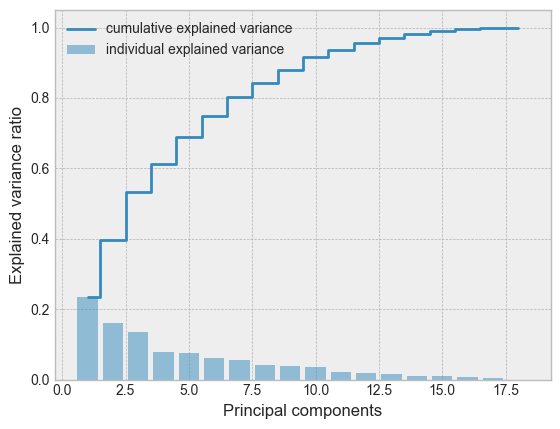

In [36]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

Around 7 to 8 dimensions are able to explain 90% of the variance. Using these components may be enough to explain the problem. 

In [37]:
P_reduce = np.array(eigvectors_sorted[0:8])
X_std_8D = np.dot(X_std, P_reduce.T)
reduced_pca = pd.DataFrame(X_std_8D)
reduced_pca

,0,1,2,3,4,5,6,7
0,-0.027077,-0.548852,-0.100702,0.758719,-0.060266,-0.604471,0.095154,-0.102693
1,-0.024820,-0.547845,-0.094435,0.758524,-0.060293,-0.604931,0.095327,-0.103675
2,-0.031049,-0.550620,-0.112034,0.759248,-0.060229,-0.603667,0.095187,-0.100896
3,-0.014889,-0.543426,-0.066106,0.757202,-0.060385,-0.606941,0.095247,-0.108168
4,-0.014889,-0.543426,-0.066106,0.757202,-0.060385,-0.606941,0.095247,-0.108168
...,...,...,...,...,...,...,...,...
16215,-0.491159,-0.015124,0.182083,2.064149,-0.128343,0.257035,0.020270,-0.931628
16216,-0.510209,-0.023618,0.128736,2.066072,-0.128136,0.260908,0.019314,-0.923238
16217,-0.508403,-0.022812,0.133750,2.065917,-0.128157,0.260541,0.019453,-0.924023
16218,-0.508403,-0.022812,0.133750,2.065917,-0.128157,0.260541,0.019453,-0.924023


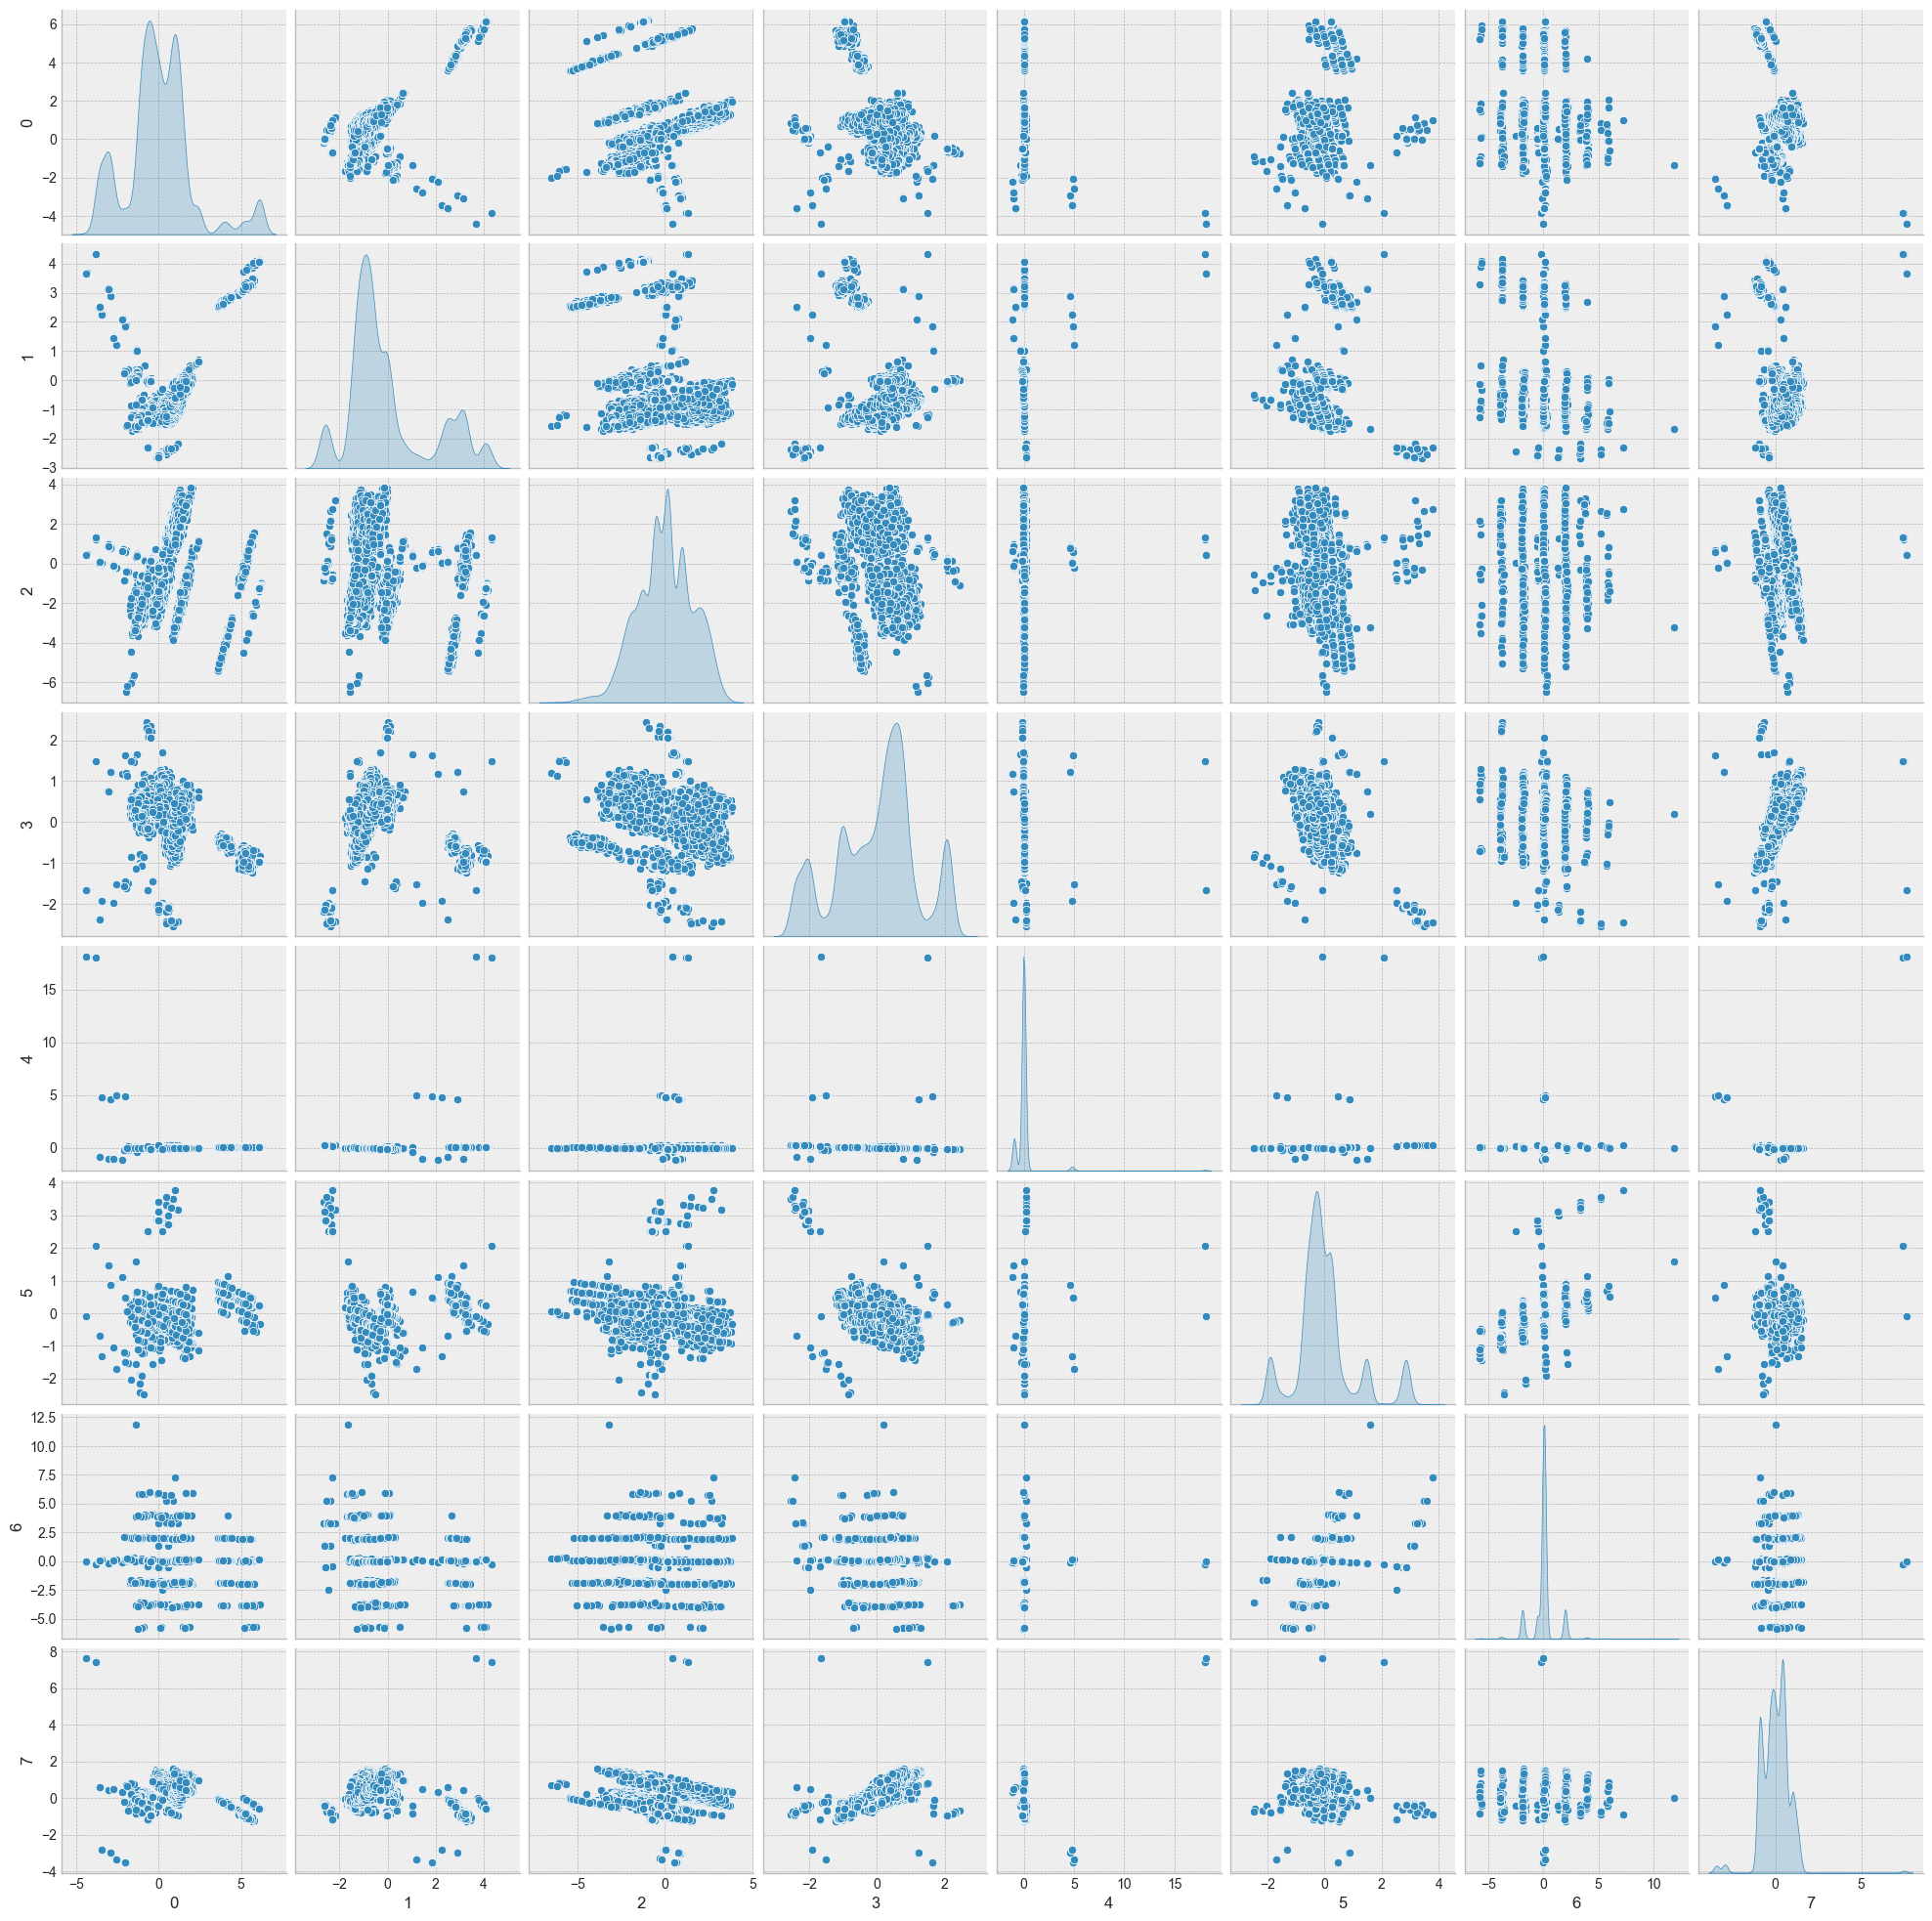

In [38]:
sns.pairplot(reduced_pca, diag_kind='kde')

After dimensionality reduction using PCA the attributes have become independent with no correlation among themselves. As most of them have cloud of data points with no linearr kind of relationship

In [42]:
svc = SVC()
#orginal Data
Orig_X_train,Orig_X_test,Orig_y_train,Orig_y_test = train_test_split(X_std,y,test_size=0.30,random_state=1)

#PCA Data
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(reduced_pca,y,test_size=0.30,random_state=1)


In [44]:
svc.fit(Orig_X_train, Orig_y_train)
Orig_y_predict = svc.predict(Orig_X_test)

In [45]:
#now fit the model on pca data with new dimension
svc1 = SVC() #instantiate the object
svc1.fit(pca_X_train,pca_y_train)

#predict the y value
pca_y_predict = svc1.predict(pca_X_test)

In [46]:
#display accuracy score of both models

print("Model Score On Original Data ",svc.score(Orig_X_test, Orig_y_test))
print("Model Score On Reduced PCA Dimension ",svc1.score(pca_X_test, pca_y_test))

print("Before PCA On Original 18 Dimension",accuracy_score(Orig_y_test,Orig_y_predict))
print("After PCA(On 8 dimension)",accuracy_score(pca_y_test,pca_y_predict))

Model Score On Original Data  0.928072338676531
Model Score On Reduced PCA Dimension  0.9247842170160296
Before PCA On Original 18 Dimension 0.928072338676531
After PCA(On 8 dimension) 0.9247842170160296


Labels are very unevenly distributed, being skewed to the right. Applying a log function wont solve this problem

Now, a correlation analysis will be done.Particulary, which ones are correlated with the Label column. To know which ones are highly correlated with Labels, we will save those ones in a variable called gold_variables.

In [78]:
nrical_columns = numerical_columns[1:-1]
num_df = dtf[nrical_columns]


Correlation doesn't always explain relationship between variables. Plotting them could lead to more insightful information. This is because not always a linear correlation is the rule. Now that we have our correlated values we also have to analyze outliers since outliers also affect correlation. 

We could either:
- Plot numerical features and explain outliers
- Remove outliers from these features and recheck correlation



In [79]:
df_num_corr = num_df.corr()["Label"][1::]
gold_variables = df_num_corr[abs(df_num_corr)>=0.1]
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(gold_variables), gold_variables))

There is 2 strongly correlated values with SalePrice:
MotorData.ActCurrent     0.134261
MotorData.ActPosition    0.152931
Name: Label, dtype: float64
